## Data exploration

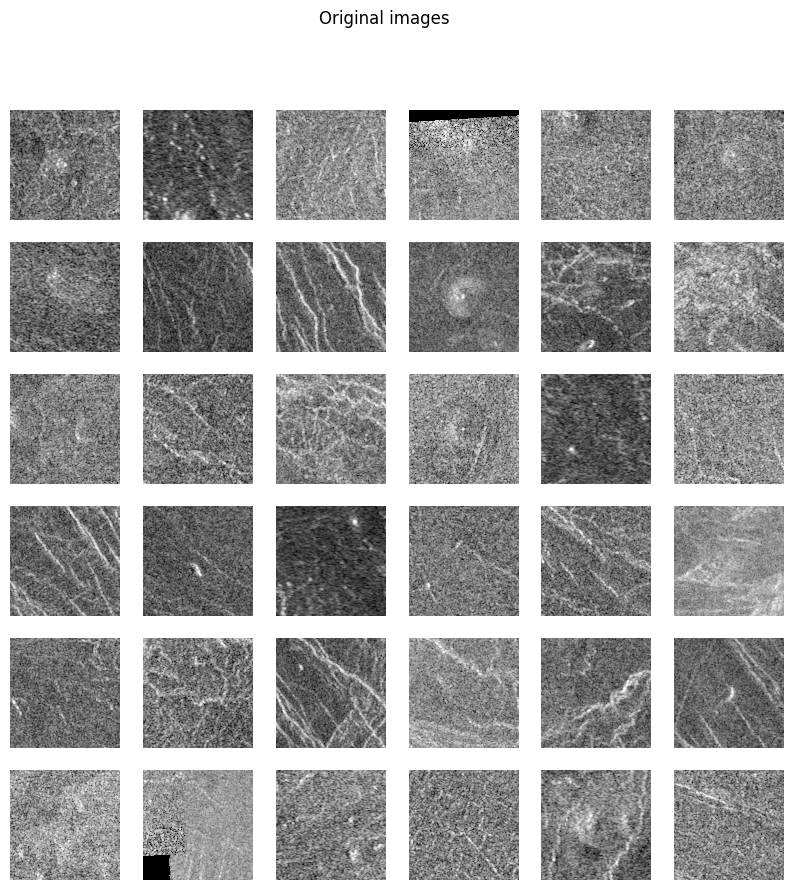

"train_labels = pd.read_csv('C:\\Users\\Isabelle\\Desktop\\MASTER_CV\\API\\archive\\Volcanoes_train\\train_labels.csv')\ntrain_labels = train_labels['Volcano?']\ndf_train = train_images\ndf_train['Volcano'] = train_labels\ndf_train_volcano = df_train[df_train['Volcano'] == 1]"

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from visualization.data_visualization import Visualization

train_images = pd.read_csv('data/original/train/train_images.csv', header = None)

train_images_np = train_images.values.tolist()
train_images_np = [np.array(image) for image in train_images_np]
train_images_np = [np.resize(image, (110,110)) for image in train_images_np]


Visualization.plot_imgs(train_images_np,6,title='Original images')

train_labels = pd.read_csv('C:\\Users\\Isabelle\\Desktop\\MASTER_CV\API\\data\\original\\train_labels.csv')
train_labels = train_labels['Volcano?']
df_train = train_images
df_train['Volcano'] = train_labels
df_train_volcano = df_train[df_train['Volcano'] == 1]

In [4]:
train_images

## 110 x 110 pixels == 12100 pixels

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,95,101,99,103,95,86,96,89,70,104,...,111,107,92,89,103,99,117,116,118,96
1,91,92,91,89,92,93,96,101,107,104,...,103,92,93,95,98,105,104,100,90,81
2,87,70,72,74,84,78,93,104,106,106,...,84,71,95,102,94,80,91,80,84,90
3,0,0,0,0,0,0,0,0,0,0,...,94,81,89,84,80,90,92,80,88,96
4,114,118,124,119,95,118,105,116,123,112,...,116,113,102,93,109,104,106,117,111,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,90,96,88,95,94,100,95,80,80,71,...,88,83,72,76,73,79,76,79,84,69
6996,82,82,84,91,74,61,73,80,75,97,...,100,78,90,88,80,88,90,90,66,71
6997,133,102,121,133,129,131,98,121,123,125,...,120,123,119,111,104,102,119,130,131,111
6998,118,117,115,107,92,76,100,102,81,106,...,104,105,102,111,99,90,105,100,100,109


In [5]:
train_labels = pd.read_csv('C:\\Users\\Isabelle\\Desktop\MASTER_CV\\API\\data\\original\\train\\train_labels.csv')

train_labels

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN
...,...,...,...,...
6995,0,NaN,NaN,NaN
6996,0,NaN,NaN,NaN
6997,0,NaN,NaN,NaN
6998,0,NaN,NaN,NaN


## Data augmentation

### (1) CLAHE augmentation

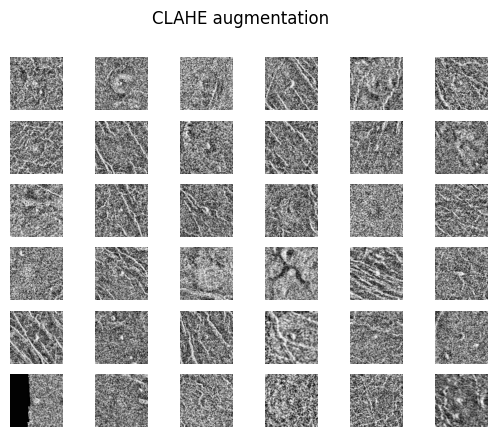

In [2]:
from preprocessing.augmentation import clahe_aug
from visualization.data_visualization import plot_imgs

df_clahe = clahe_aug(df_train_volcano.iloc[:, :-1], 5.0, 110, 110)

df_clahe_np = df_clahe.values.tolist()
df_clahe_np = [np.array(image) for image in df_clahe_np]
df_clahe_np = [np.resize(image, (110,110)) for image in df_clahe_np]

plot_imgs(df_clahe_np,6,title='CLAHE augmentation')

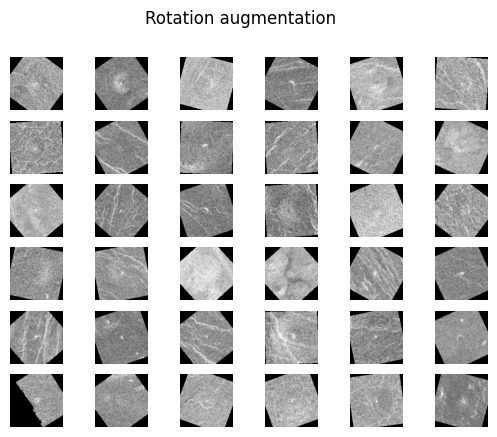

In [3]:
from preprocessing.augmentation import rotate_aug
from visualization.data_visualization import plot_imgs

df_rotate = rotate_aug(df_train_volcano.iloc[:, :-1], 110, 110)

df_rotate_np = df_rotate.values.tolist()
df_rotate_np = [np.array(image) for image in df_rotate_np]
df_rotate_np = [np.resize(image, (110,110)) for image in df_rotate_np]

plot_imgs(df_rotate_np,6, title='Rotation augmentation')

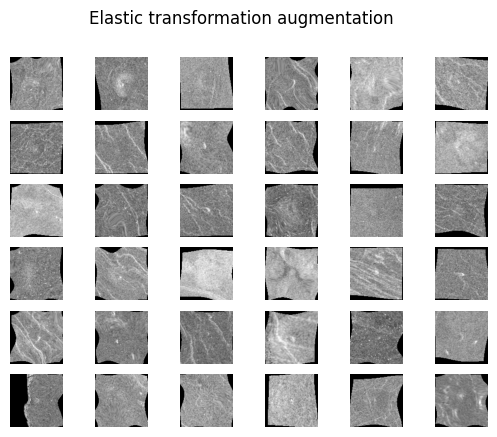

In [4]:
from preprocessing.augmentation import elastic_aug
from visualization.data_visualization import plot_imgs

alpha_range = (30, 40) 
sigma_range = (5, 6)   


df_elastic = elastic_aug(df_train_volcano.iloc[:, :-1], alpha_range, sigma_range, 110, 110)

df_elastic_np = df_elastic.values.tolist()
df_elastic_np = [np.array(image) for image in df_elastic_np]
df_elastic_np = [np.resize(image, (110,110)) for image in df_elastic_np]

plot_imgs(df_elastic_np,6, title='Elastic transformation augmentation')

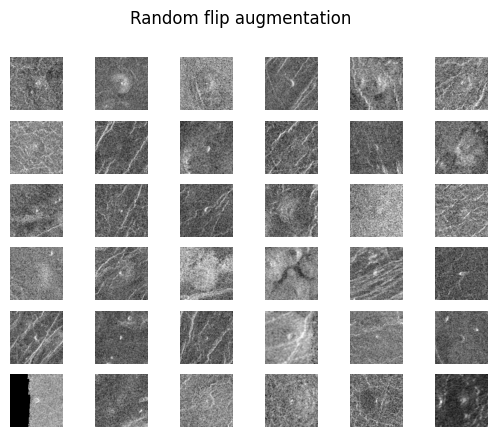

In [5]:
from preprocessing.augmentation import flip_aug
from visualization.data_visualization import plot_imgs


df_flip = flip_aug(df_train_volcano.iloc[:, :-1], 110, 110)

df_flip_np = df_flip.values.tolist()
df_flip_np = [np.array(image) for image in df_flip_np]
df_flip_np = [np.resize(image, (110,110)) for image in df_flip_np]

plot_imgs(df_flip_np,6, title='Random flip augmentation')

In [6]:
dfs = [train_images, df_clahe, df_elastic, df_flip, df_rotate]

df_combined = pd.concat(dfs, ignore_index=True)

df_combined.shape

(11000, 12101)

In [7]:
train_labels_augmented = np.ones(4000, dtype=int)

# Concatenar os rótulos
train_labels_combined = np.concatenate([train_labels, train_labels_augmented])

train_labels_combined.shape

(11000,)

In [8]:
df_combined['Volcano'] = train_labels_combined

df_combined.head()

,0,1,2,3,4,5,6,7,8,9,...,12091,12092,12093,12094,12095,12096,12097,12098,12099,Volcano
0,95,101,99,103,95,86,96,89,70,104,...,107,92,89,103,99,117,116,118,96,1
1,91,92,91,89,92,93,96,101,107,104,...,92,93,95,98,105,104,100,90,81,0
2,87,70,72,74,84,78,93,104,106,106,...,71,95,102,94,80,91,80,84,90,0
3,0,0,0,0,0,0,0,0,0,0,...,81,89,84,80,90,92,80,88,96,0
4,114,118,124,119,95,118,105,116,123,112,...,113,102,93,109,104,106,117,111,115,0


In [9]:
df_combined = df_combined.sample(frac = 1).reset_index(drop=True)

df_combined.head()

,0,1,2,3,4,5,6,7,8,9,...,12091,12092,12093,12094,12095,12096,12097,12098,12099,Volcano
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,84,78,91,86,86,86,92,110,107,106,...,79,70,62,82,77,84,78,90,86,1
2,83,81,66,73,71,66,89,92,97,90,...,89,79,84,92,92,90,88,77,74,0
3,128,107,164,173,146,94,107,142,144,158,...,180,197,187,152,87,78,101,139,148,1
4,80,71,72,77,90,95,78,76,76,73,...,92,94,100,95,103,109,101,86,73,0


In [11]:
df_combined.to_csv('archive/Data_augmentation/train_aug.csv')

In [14]:
df_combined.iloc[:,:-1].head()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,84,78,91,86,86,86,92,110,107,106,...,88,79,70,62,82,77,84,78,90,86
2,83,81,66,73,71,66,89,92,97,90,...,103,89,79,84,92,92,90,88,77,74
3,128,107,164,173,146,94,107,142,144,158,...,167,180,197,187,152,87,78,101,139,148
4,80,71,72,77,90,95,78,76,76,73,...,74,92,94,100,95,103,109,101,86,73


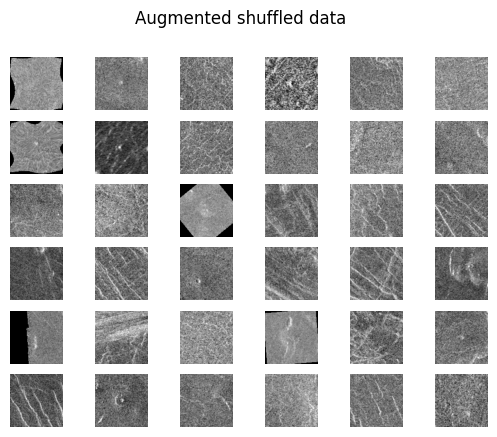

In [16]:
combined_np = df_combined.iloc[:,:-1].values.tolist()
combined_np = [np.array(image) for image in combined_np]
combined_np = [np.resize(image, (110,110)) for image in combined_np]


plot_imgs(combined_np,6,title='Augmented shuffled data')